In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
from sklearn.metrics import r2_score,mean_squared_error
import warnings
from pmdarima.arima import auto_arima
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set()

In [66]:
raw_csv_data = pd.read_csv('KUAKATA.csv')
raw_csv_data.head()
df_comp =raw_csv_data.copy()

In [67]:
df_comp.Date = pd.to_datetime(df_comp.Date, dayfirst = True)
df_comp.set_index("Date",inplace=True)

In [68]:
df_comp = df_comp.asfreq('d') #'d' -> daily

In [69]:
df_comp2 = df_comp.copy()
del df_comp['LOW']

In [70]:
size = int(len(df_comp)*0.8)
df = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]
df2 = df_comp2.iloc[:size]
df2_test = df_comp2.iloc[size:]

In [71]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

In [72]:
df_test.head()

,SURFACE PRESSURE,DEW POINT,TEMPERATURE,PRECIPITATION,MAX WIND SPD,RELATIVE HUMIDITY,MIN TEMP,N_ICE EXTENT,S_ICE EXTENT,HIGH
Date,,,,,,,,,,
2021-03-14,101.07,17.29,34.04,0.03,4.55,55.19,23.01,14.596,4.388,1.20
2021-03-15,101.00,16.23,33.98,0.01,5.88,52.56,22.94,14.604,4.450,1.19
2021-03-16,100.96,17.42,34.87,0.00,5.38,56.75,23.54,14.674,4.505,1.13
2021-03-17,100.91,16.72,35.05,0.00,4.43,56.31,23.57,14.718,4.579,1.02
2021-03-18,100.91,17.35,35.12,0.00,5.95,56.31,24.12,14.783,4.679,0.89


In [73]:
start_date = "2021-03-14"
end_date = "2021-12-31"

In [74]:
df_comp.head()

,SURFACE PRESSURE,DEW POINT,TEMPERATURE,PRECIPITATION,MAX WIND SPD,RELATIVE HUMIDITY,MIN TEMP,N_ICE EXTENT,S_ICE EXTENT,HIGH
Date,,,,,,,,,,
2018-01-01,101.17,16.10,23.80,2.13,4.23,79.25,16.54,12.484,6.384,-0.9737
2018-01-02,101.17,13.12,25.62,0.00,4.59,67.69,15.07,13.764,2.685,-0.8037
2018-01-03,100.97,18.12,32.19,0.08,5.50,64.62,21.28,14.336,2.351,-0.9537
2018-01-04,100.95,22.08,30.01,2.58,4.37,77.38,24.26,14.196,4.930,-0.6637
2018-01-05,100.73,24.30,30.39,29.99,5.12,80.81,25.99,13.054,7.392,-0.4237


In [75]:
mod_auto2 = auto_arima(df.HIGH,exogenous = df[['SURFACE PRESSURE','TEMPERATURE',
                                               'MAX WIND SPD','S_ICE EXTENT']]
                       ,m = 15, max_p = 11, max_q = 12)

In [76]:
mod_auto2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1168
Model:             SARIMAX(2, 1, 1)x(2, 0, 1, 15)   Log Likelihood                -290.491
Date:                            Sat, 26 Mar 2022   AIC                            602.983
Time:                                    18:22:44   BIC                            658.667
Sample:                                01-01-2018   HQIC                           623.988
                                     - 03-13-2021                                         
Covariance Type:                              opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
SURFACE PRESSURE    -0.1028      0.039     -2.616      0.009      -0.180      -0.026
TEMPERATURE         -0.0013      0.004     -0.295      0.768      -0.010       0.007
MAX WIND SPD         0.0234      0.006      3.915      0.000       0.012       0.035
S_ICE EXTENT         0.0200      0.003      7.354      0.000       0.015       0.025
ar.L1                0.5828      0.019     31.081      0.000       0.546       0.620
ar.L2                0.1452      0.022      6.727      0.000       0.103       0.188
ma.L1               -0.9711      0.010   -100.784      0.000      -0.990      -0.952
ar.S.L15             0.6021      0.057     10.524      0.000       0.490       0.714
ar.S.L30             0.1822      0.028      6.580      0.000       0.128       0.236
ma.S.L15            -0.5653      0.047    -11.935      0.000      -0.658      -0.472
sigma2               0.0960      0.002     42.622      0.000       0.092       0.100
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              3988.61
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.18   Skew:                             0.90
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
df_auto_pred_pr2 = pd.DataFrame(mod_auto2.predict(n_periods = len(df_test[start_date:end_date]),exogenous = df_test[['SURFACE PRESSURE','TEMPERATURE',
                                               'MAX WIND SPD','S_ICE EXTENT']][start_date:end_date]),
                               index = df_test[start_date:end_date].index)

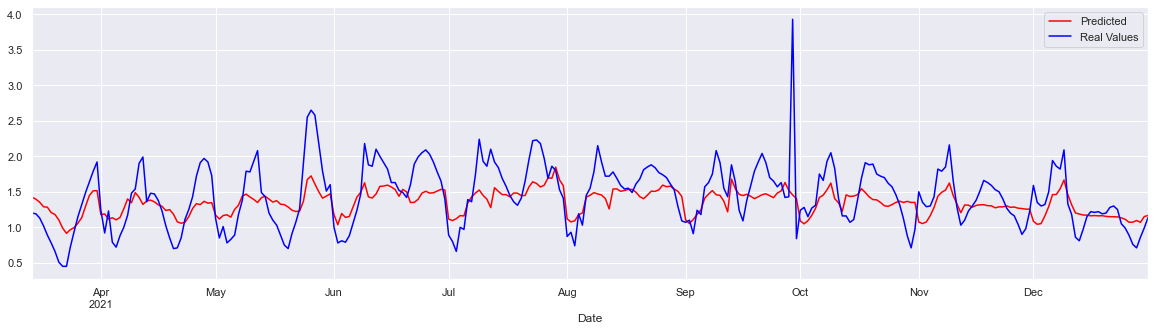

In [78]:
df_auto_pred_pr2[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.HIGH[start_date:end_date].plot(color = "blue")
plt.legend(['Predicted', 'Real Values'])

In [80]:
acc =r2_score(df_test.HIGH[start_date:end_date],df_auto_pred_pr2[start_date:end_date])
print("Testing Score: ",acc)

Testing Score:  0.35167457572419836
